In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('./data/preprocessing_laptop.csv')

In [3]:
dataset.head()

,Unnamed: 0,marka,ekran_boyutu,ekran_kartı,ekran_yenileme_hızı,hard_disk_kapasitesi,klavye,kullanım_amacı,ram_sistem_bellegi,ram_tipi,ssd_kapasitesi,cozunurluk_standartı,islemci_nesli,islemci_tipi,islemci_cekirdek_sayisi,isletim_sistemi,fiyat
0,0,7,15.6,4,60.0,0.0,0.0,0.0,8.0,1,256.0,0.0,11.0,6,4.0,0,10.499
1,1,9,15.6,0,60.0,0.0,0.0,0.0,16.0,1,512.0,0.0,5.0,2,8.0,0,13.499
2,2,9,15.6,4,60.0,0.0,0.0,0.0,4.0,1,0.0,0.0,4.0,4,4.0,0,6.548
3,4,8,14.0,3,60.0,0.0,0.0,1.0,8.0,1,512.0,0.0,11.0,6,4.0,3,14.999
4,5,3,15.6,3,60.0,0.0,0.0,1.0,4.0,1,120.0,0.0,11.0,4,2.0,3,6.939


In [4]:
dataset=dataset.drop(["Unnamed: 0"],axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marka                    864 non-null    int64  
 1   ekran_boyutu             864 non-null    float64
 2   ekran_kartı              864 non-null    int64  
 3   ekran_yenileme_hızı      864 non-null    float64
 4   hard_disk_kapasitesi     864 non-null    float64
 5   klavye                   864 non-null    float64
 6   kullanım_amacı           864 non-null    float64
 7   ram_sistem_bellegi       864 non-null    float64
 8   ram_tipi                 864 non-null    int64  
 9   ssd_kapasitesi           864 non-null    float64
 10  cozunurluk_standartı     864 non-null    float64
 11  islemci_nesli            864 non-null    float64
 12  islemci_tipi             864 non-null    int64  
 13  islemci_cekirdek_sayisi  864 non-null    float64
 14  isletim_sistemi          8

In [6]:
x = dataset.iloc[:, 0:15].values
y = dataset.iloc[:, 15].values
y = y.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (691, 15)
x_test : (173, 15)
y_train : (691, 1)
y_test : (173, 1)


In [8]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [9]:
# LinearRegression, Lasso
from sklearn.linear_model import LinearRegression, Lasso

In [10]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_predict = lr.predict(x_test)
y_predict

array([[ 26.76835489],
       [ 17.4945485 ],
       [ 12.71414775],
       [ 36.19219597],
       [ 23.7056826 ],
       [ 52.13829518],
       [ 17.00926845],
       [ 22.32125328],
       [ 25.30328799],
       [ 20.03483144],
       [  8.35189827],
       [ 66.9939624 ],
       [ 40.88208975],
       [  9.68917758],
       [ 20.71841392],
       [101.93553834],
       [ 30.26857866],
       [ 40.36503991],
       [ 19.76925392],
       [ 35.71987999],
       [ 56.4113848 ],
       [ 32.05091462],
       [ 33.6748741 ],
       [  4.53383587],
       [ 37.61307142],
       [ 28.09832005],
       [ 26.18262164],
       [ 34.77599732],
       [ 23.1622744 ],
       [ 40.49665046],
       [ 24.73784876],
       [  5.76334837],
       [ 13.65956387],
       [ 48.10034083],
       [ 15.96045582],
       [ 28.91529721],
       [ 47.57749406],
       [ 40.61608652],
       [ 32.42183529],
       [ 18.93062444],
       [ 29.06977299],
       [  5.61697154],
       [ 39.27192009],
       [ 30

In [11]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  6.346681992479651
 root mean squared error:  9.366999931245237
Coefficient of determination R^2:  0.7534510624892383


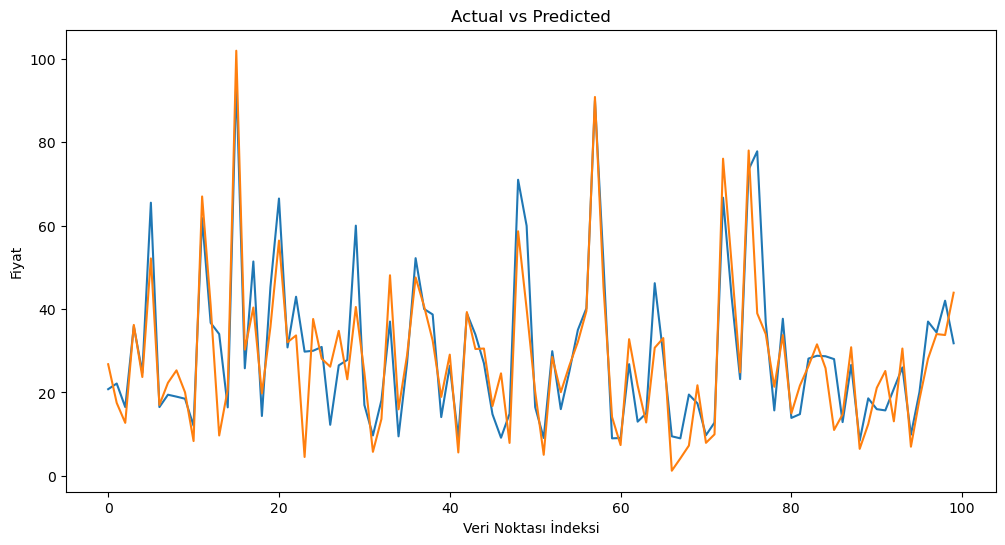

In [12]:
indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_predict[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')

plt.show()

mean absolute error:  5.626385356454722
 root mean squared error:  15.188687221953474
Coefficient of determination R^2:  0.3517499201887233


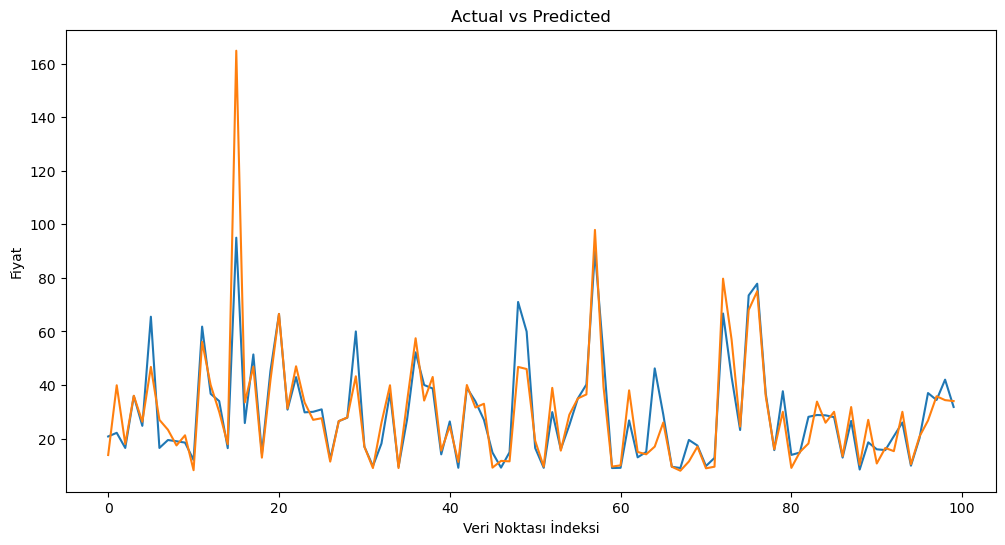

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_predict_dt))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_dt)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_dt))


indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_predict_dt[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')

plt.show()

mean absolute error:  6.346464592891478
root mean squared error:  9.366817323213603
Coefficient of determination R^2:  0.7534606752526982


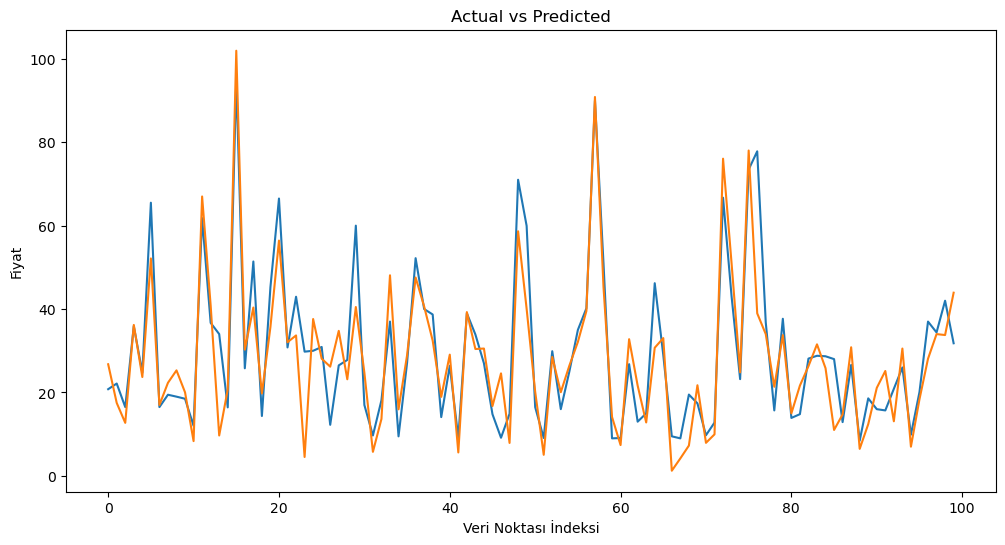

In [14]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test)


print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))


indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_predict_lasso[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')

plt.show()

D:\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


mean absolute error:  4.187785608014819
root mean squared error:  7.933275987698676
Coefficient of determination R^2:  0.823149119127014


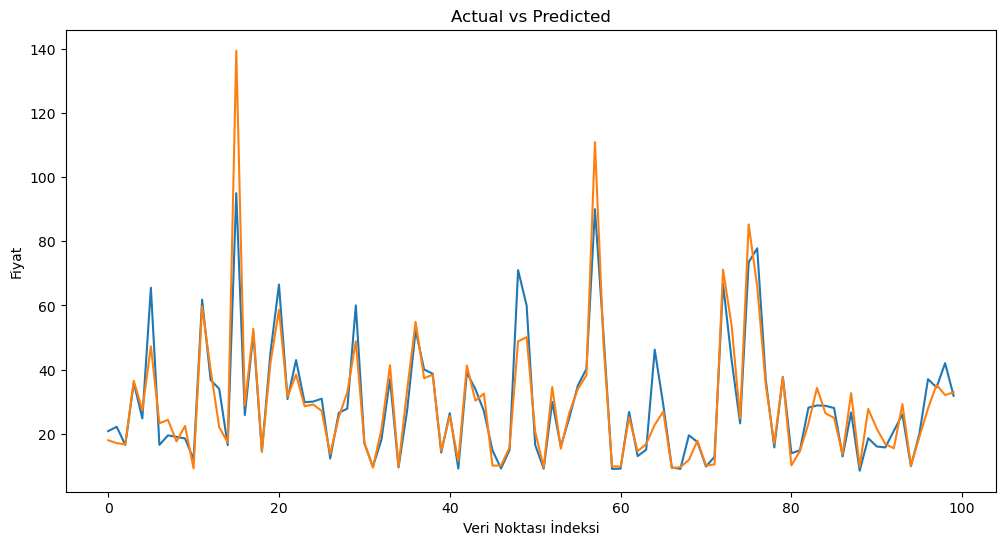

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)


print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_predict_rf[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')

plt.show()

D:\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root mean squared error:  142.98612805576093
Test Seti - R-squared (R2):  0.5982128830963687


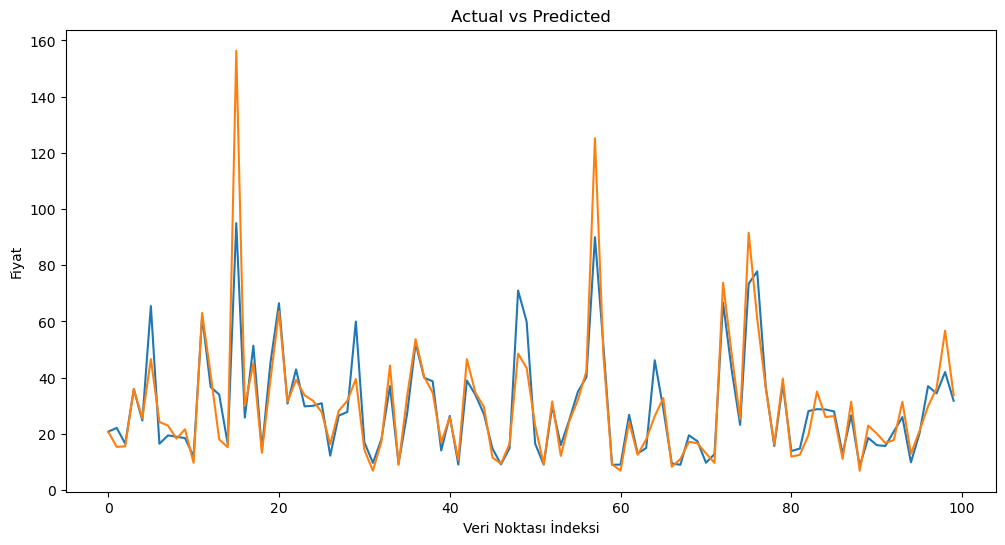

In [16]:
#Gradient Boosting Regresyonu ile train-test

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

y_tahmin_test = model.predict(x_test)

mse_test = mean_squared_error(y_test, y_tahmin_test)
r2_test = r2_score(y_test, y_tahmin_test)

print('root mean squared error: ', mse_test)
print('Test Seti - R-squared (R2): ',r2_test)


indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_tahmin_test[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')

plt.show()

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root mean squared error:  97.20276850950772
Test Seti - R-squared (R2):  0.7268628737239755


Text(0.5, 1.0, 'Actual vs Predicted')

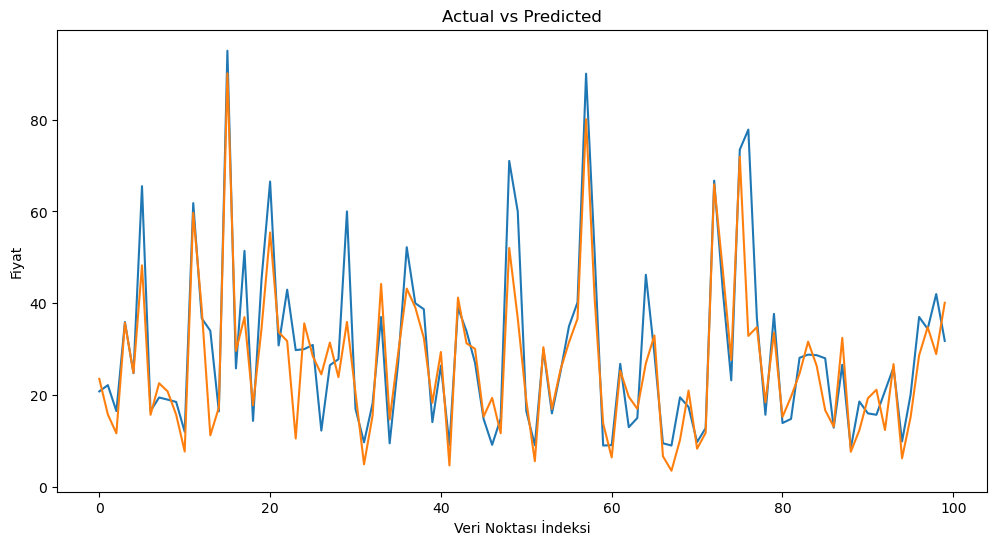

In [18]:
#SVM (Support Vector Machine) ile train-test
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')  # Lineer kernel kullanılmıştır, farklı kernel seçenekleri de bulunmaktadır
svr_model.fit(x_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred_svm = svr_model.predict(x_test)


mse_test_svm = mean_squared_error(y_test, y_pred_svm)
r2_test_svm = r2_score(y_test, y_pred_svm)


print('root mean squared error: ', mse_test_svm)
print('Test Seti - R-squared (R2): ',r2_test_svm)

indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_pred_svm[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')


root mean squared error:  101.3719015428902
Test Seti - R-squared (R2):  0.7151477237003508


Text(0.5, 1.0, 'Actual vs Predicted')

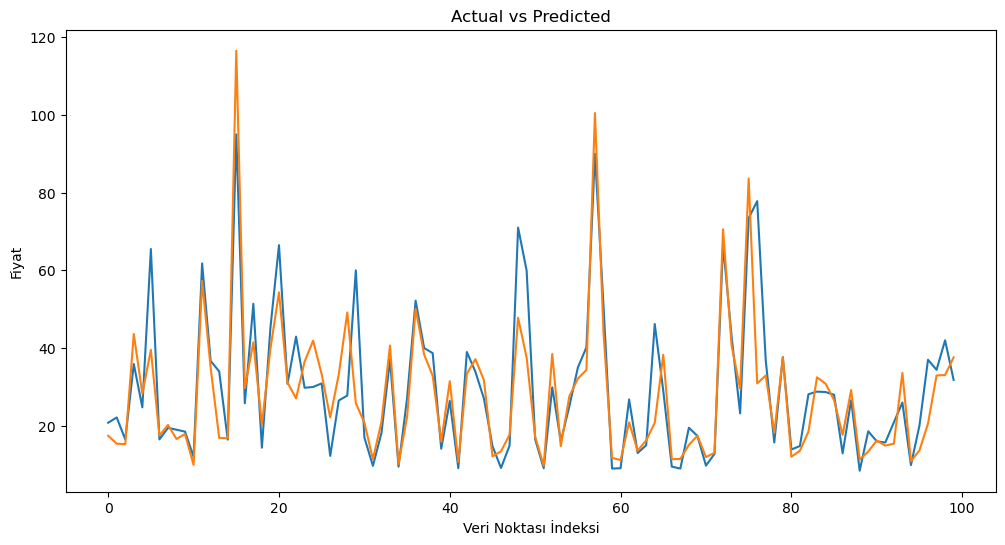

In [24]:
#knn algoritması ile train-test

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

k_degeri = 5  # K değeri (ayarlanabilir)
model = KNeighborsRegressor(n_neighbors=k_degeri)
model.fit(x_train, y_train)

y_tahmin_knn = model.predict(x_test)

mse = mean_squared_error(y_test, y_tahmin_knn)
r2 = r2_score(y_test, y_tahmin_knn)

print('root mean squared error: ', mse)
print('Test Seti - R-squared (R2): ',r2)

indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_tahmin_knn[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')

mean absolute error:  6.31889674881862
root mean squared error:  9.361086511030098
Coefficient of determination R^2:  0.7537622586626334


D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Actual vs Predicted')

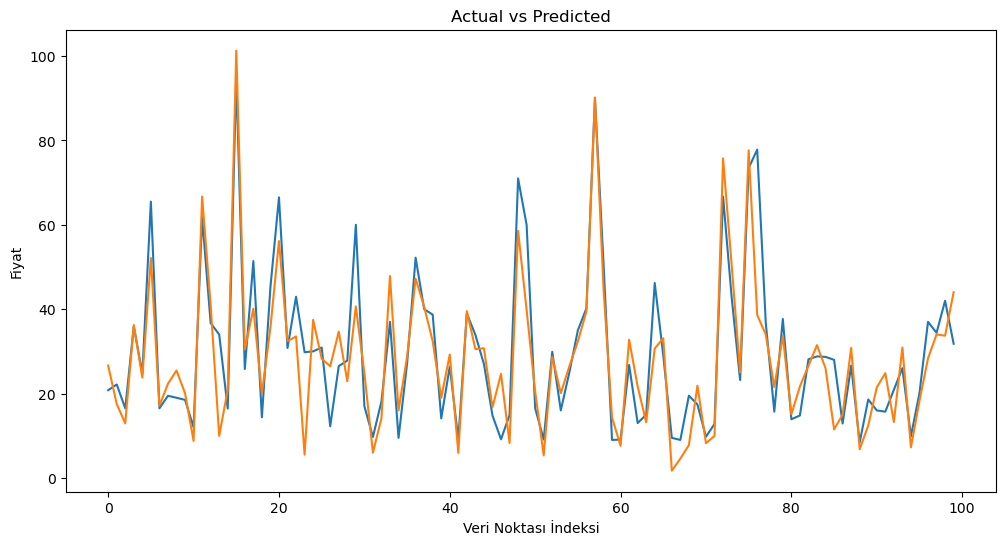

In [20]:
from sklearn.linear_model import BayesianRidge

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(x_train, y_train)
y_pred_bayes = bayesian_ridge_model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_pred_bayes))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_pred_bayes)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_pred_bayes))

indices = np.arange(len(y_test))

fig = plt.figure(figsize=(12, 6))

plt.plot(indices[:100], y_test[:100], label='Actual')
plt.plot(indices[:100], y_pred_bayes[:100], label='Predicted')

plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Fiyat')
plt.title('Actual vs Predicted')

In [21]:
import seaborn as sns

In [22]:
final_RMSE = pd.DataFrame( data  = [[10.883,8.774,10.884,6.240,40.598,103.647,90.092,10.875],
                                    [0.677,0.790,0.677,0.893,0.889,0.717,0.754,0.677]],
                          columns  = ['Linear Regression','Decision Tree Regressor','Lasso','Random Forest Regressor',
                                      'Gradient Boosting','Polinom Regresyon','KNN','Bayesian Ridge'],index =['RMSE','R2'])

final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,10.883000,0.677000
Decision Tree Regressor,8.774000,0.790000
Lasso,10.884000,0.677000
Random Forest Regressor,6.240000,0.893000
Gradient Boosting,40.598000,0.889000
Polinom Regresyon,103.647000,0.717000
KNN,90.092000,0.754000
Bayesian Ridge,10.875000,0.677000


In [23]:
#random forest en iyi algoritma sonuçlara göre
import joblib
joblib.dump(rf, "./random_forest_model.pkl")

['./random_forest_model.pkl']